# 2020-08-16 課題

## 課題
- [オリジナルコンテンツへのリンク](https://phasetr.com/mthlp1/)
- [勉強会のコンテンツまとめ：GitHub へのリンク](https://github.com/phasetr/studygroup/tree/master/programming-for-junior-highschool-mathphys)
- matplotlib を忘れないように、簡単なグラフをいくつか描いてみてください。
- TeX でいろいろな式を書いてみましょう。
- 実際に競プロの問題をいくつか解いてみましょう。例えば次のあたりからアタックします。数学・物理系の話として、まずはマスターオブ整数を眺めてみます。今回は[約数列挙](https://qiita.com/drken/items/a14e9af0ca2d857dad23#3-%E7%B4%84%E6%95%B0%E5%88%97%E6%8C%99)の[C - Digits in Multiplication](https://atcoder.jp/contests/abc057/tasks/abc057_c)を見ましょう。
    - [AtCoder マスターオブ整数シリーズ](https://qiita.com/drken/items/a14e9af0ca2d857dad23)
    - [初心者向け AtCoder ブートキャンプ](https://kenkoooo.com/atcoder/#/training/Boot%20camp%20for%20Beginners)
    - [蟻本初級対応問題](https://qiita.com/drken/items/fd4e5e3630d0f5859067)
- 応用情報の本を一日2ページくらい眺めてみてください。毎日やれば大体 1 年で読み終わります。
    - 次回対応予定：7.4 ネットワーク層のプロトコルと技術
- [東大の AWS クラウド講義資料](https://tomomano.gitlab.io/intro-aws/#_hands_on_5_bashoutter)を眺めてみてください。せっかくなので状況を見て（私の勉強も兼ねて）「勉強会前半パート」で取り上げようと思います。（とりあえず当面はやらない感じにする？）
- [勉強会の案内: アインシュタインの特殊相対性理論の原論文を多言語で読む会](https://phasetr.com/blog/2020/08/22/studygroup-for-relativity/)の話
- 微分積分の話
- 自分用 TODO：Julia 化をがんばる

## メモ：先に進む前に録画してあるか確認しよう

## 自分用メモ
- 遅延型方程式に対するコメント追加
- matplotlib のチュートリアルを読もうの会
    - 公式情報に触れる重要性
    - 古い情報が古いと書いてあったりする：たとえば `pylab`
        - [参考: これの Note](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
    - [Gallery](https://matplotlib.org/gallery/index.html#user-interfaces)
        - 見ていて面白い
        - 「どこをいじるとどう変わるか」が視覚的にわかる
        - 公式情報なのできちんとアップデートしてくれている（はず）
        - 公式情報にソースがあるので自分でいろいろ書き換えていて破滅したとき、必ずオリジナルを復元できる

## Matplotlib
- 本当に簡単な図を描く
- $x^2$ のフーリエ級数：[参考](https://batapara.com/archives/fourier-series-example4.html/)

\begin{align}
f(x)
=
x^2
=
\frac{\pi^2}{3} + \sum_{n=1}^\infty \frac{(-1)^n}{n^2} 4 \cos nx.
\end{align}

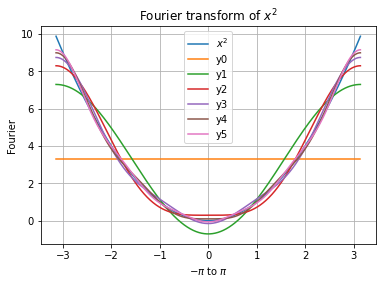

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(- np.pi, np.pi, 1001)
xsquared = x**2
y0 = np.full(len(x), np.pi**2 / 3)
y1 = y0 - 4 * np.cos(x)
y2 = y1 + (1/2**2) * 4 * np.cos (2 * x)
y3 = y2 - (1/3**2) * 4 * np.cos (3 * x)
y4 = y3 + (1/4**2) * 4 * np.cos (4 * x)
y5 = y4 - (1/5**2) * 4 * np.cos (5 * x)

plt.plot(x, xsquared, label="$x^2$")
plt.plot(x, y0, label="y0")
plt.plot(x, y1, label="y1")
plt.plot(x, y2, label="y2")
plt.plot(x, y3, label="y3")
plt.plot(x, y4, label="y4")
plt.plot(x, y5, label="y5")
plt.xlabel("$-\pi$ to $\pi$")
plt.ylabel("Fourier")
plt.title("Fourier transform of $x^2$")

plt.grid()
plt.legend()
#plt.axes().set_aspect('equal', 'datalim') # アスペクト比を合わせる
plt.show()

## TeX の記録
- 測地線の方程式

\begin{align}
\nabla_{c'} c'
&=
0, \\
\frac{d^2 c^i}{ds^2} + \Gamma^i_{jk} \frac{dc^j}{ds} \frac{dc^k}{ds}
&=
0.
\end{align}

## 競プロ、AtCoder

### [約数列挙](https://qiita.com/drken/items/a14e9af0ca2d857dad23#3-%E7%B4%84%E6%95%B0%E5%88%97%E6%8C%99)の[C - Digits in Multiplication](https://atcoder.jp/contests/abc057/tasks/abc057_c)
> 整数 $N$ が与えられます。ここで、$2$ つの正の整数 $A,B$ に対して、$F(A,B)$ を「$10$ 進表記における、$A$ の桁数と $B$ の桁数のうち大きい方」と定義します。例えば、$F(3,11)$ の値は、$3$ は $1$ 桁、$11$ は $2$ 桁であるため、$F(3,11)=2$ となります。$2$ つの正の整数の組 $(A,B)$ が $N=A×B$ を満たすように動くとき、$F(A,B)$ の最小値を求めてください。

### 約数列挙のポイント
- 素数判定と同じく $a = 1,2,3,\dots,\sqrt{N}$ で割り続けてためていく。
- $\sqrt{N}$ までしか見ないので、$a$ を約数にしたら $N/a$ も約数リストにためる。
    - $N$ が $a^2$ を約数に含むとき、$a = N/a$ になるときがあるので、この重複を除いてリストに入れる。
    - Python など集合がある場合は集合にためてもいい。
- 今回の問題は必ずしも全約数列挙ではないので、このリスト自体は作らなくてもいい。
- [参考解答](https://atcoder.jp/contests/abc057/submissions/16039265)

In [ ]:
import math

def solve(N):
    a = math.ceil(math.sqrt(N))
    p = []

    for i in range(1, a+1):
        if N % i == 0:
            x = len(str(i))
            y = len(str(N // i))
            p.append(max(x, y))

    return min(p)

print(solve(10000)) # 3
print(solve(1000003)) # 7
print(solve(9876543210)) # 6

3
7
6


## IT 基礎知識
- 応用情報の本を一日2ページくらい眺めてみてください。毎日やれば大体 1 年で読み終わります。
    - 次回対応予定：7.4 ネットワーク層のプロトコルと技術


### 復習

#### OSI基本参照モデル
- 会社の部署と同じ気分
- 特定層は自分のところにしか責任を持たない
- 「他の層は他の層で専門的に管轄してね」
- お互い全くの無関係ではないが、基本的には自分のことだけ考えていればいい。

#### ある端末が持つ・割り当てられる IP
- **大前提**：同じマシンでも状況に応じて IP はいろいろ変わる
    - 例：スマホ
        - 家の中のネット環境
        - 外で単独で使うとき
        - 適当な Wi-Fi につなぐとき
    - 気分：どのルーターの配下にいるか？
        - ルーターはあとで触れる
- 参考：[WAN](http://qa.elecom.co.jp/faq_detail.html?id=8009&category=152&page=1)
- 参考：[インターネットの仕組みとISPの構造](https://www.slideshare.net/taijitsuchiya5/isp-55698799)

<img src="https://viral-community.com/wp-content/uploads/2014/02/router-com-2.bmp">

### 本の記述を追いかける

#### P.386 コネクションレス型通信である
- [Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B3%E3%83%8D%E3%82%AF%E3%82%B7%E3%83%A7%E3%83%B3%E3%83%AC%E3%82%B9%E5%9E%8B%E9%80%9A%E4%BF%A1)
- TCP/IP の UDP で使われる
- Wikipedia の [UDP](https://ja.wikipedia.org/wiki/User_Datagram_Protocol) から
    - 参考：[ハンドシェイク](https://ja.wikipedia.org/wiki/%E3%83%8F%E3%83%B3%E3%83%89%E3%82%B7%E3%82%A7%E3%82%A4%E3%82%AF)
    - 「トランスポート層でのそのような処理のオーバーヘッドを削減している」

> 通信中のパケット紛失や重複、改竄の検出やそのための対応が必要な場合はアプリケーションで行う。それによってトランスポート層でのそのような処理のオーバーヘッドを削減している。リアルタイム・システムでは遅れているパケットを待つよりもそういうパケットはないものとして処理する方が好ましいため、適時性を重視するアプリケーションでよく使われている[1]。トランスポート層での誤り検出機能が必須なら、その用途に設計された Transmission Control Protocol (TCP) または Stream Control Transmission Protocol (SCTP) を使えばよい。

- オーバーヘッドの問題はいろいろなところで出てくる
- [参考](http://e-words.jp/w/%E3%82%AA%E3%83%BC%E3%83%90%E3%83%BC%E3%83%98%E3%83%83%E3%83%89.html)：「ITの分野では、コンピュータで何らかの処理を行う際に、その処理を行うために必要となる付加的、間接的な処理や手続きのことや、そのために機器やシステムへかかる負荷、余分に費やされる処理時間などのことをオーバーヘッドということが多い。」

#### P.386 ルーターとは
- 異なるネットワークを相互に接続するネットワーク機器
- [Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AB%E3%83%BC%E3%82%BF%E3%83%BC)

> 通常はOSI基本参照モデルでの第1層（物理層）から第3層（ネットワーク層）までの接続を担う。一般的に用いられるルーターは、基本機能として各ネットワーク間でのIPパケット（第3層）をやり取りできるようにする装置であるが、実際は基本に加えてさまざまな付加機能を実現している。

> ハードウェアとしてのルーターは、おおまかに通信事業者 (ISP) 向けのコアルーターと企業向けのエッジルーター、コンシューマー向けのブロードバンドルーターに分けられる。

- [参考](https://www.netage.ne.jp/wifi-rental/column/router/)

> ルーターというのは「会社の電話の内線と外線の交換機」にそっくりです。最初からそう説明すればよかったですね。

> あなたが iPad のサファリを開き、キーワード「NETAGE のWiFi レンタルは国内最安？」を Google で検索すると、iPad は WiFi 経由で WiFi ルーターに接続されます。そして WiFi ルーターは LTE（3G や 4G でもいいですけど）で近くの基地局と接続し、その先のインターネットに接続します。
LAN につながった iPad から WiFi 経由でWiFi ルーターにリクエストが送信されたのです。その後、WiFi ルーターから近所のアンテナ基地局へ、そこから更にインターネットを経由して Google サーバにリクエストが届きます。

> このようなネットワーク接続状態のとき、WiFi ルーターのこっち側を LAN（ローカルエリアネットワーク）、向こう側を WAN（ワイドエリアネットワーク）と呼びます。（必ずしも正確ではないですが、シンプルに考え、）WAN はインターネット、LAN は WiFi、とすれば分かりやすいと思います。

#### P.386 （IP）ヘッダ
- ヘッダはいろいろなところで出てくる
- [http ヘッダ](https://developer.mozilla.org/ja/docs/Web/HTTP/Headers)
    - [リクエストヘッダ](https://developer.mozilla.org/ja/docs/Glossary/Request_header)
    - [レスポンスヘッダ](https://developer.mozilla.org/ja/docs/Glossary/Response_header)
        - 200 OK
- [メールのヘッダ](https://www.kitasato-u.ac.jp/knc/mail/download/info_mail_header_v2.pdf)
- 参考：ヘッダの改ざん、セキュリティ、ヘッダインジェクション
    - [偽装メールを見破れ！](https://www.atmarkit.co.jp/ait/articles/0603/29/news120.html)
    - [HTTPヘッダ・インジェクションの対策まとめ](https://www.shadan-kun.com/blog/measure/2674/)

#### P.389 特殊なIPアドレス
- 8.8.8.8：Google の DNS として有名
- 127.0.0.1：開発時によく使う。Windows だと「c:/Windows/System32/drivers/etc/hosts」ファイルでドメイン名「localhost」を指定して使うこともある。
- グローバル IP とローカル IP
    - 最初に触れた問題
    - 外向きにグローバル IP アドレス、内向きにプライベート IP アドレスを使う
    - IP の無駄遣いを防ぐためもある
    - クラス A-C：会社の規模によって使い分ける
    - もちろん A が大企業向け、C が小企業・家庭用という感じ
    - 本でいきなり「192.168.」というアドレスが出てくることがあるが、それはまさにこのプライベートアドレスで話をしている。

#### P.390 サブネットマスク
- これは社内セキュリティに使われたりする
- [参考](https://www.cman.jp/network/term/subnet/)
    - 会社の部署間でデータの参照を制限する場合
    - パソコンやサーバの台数が多く分割して管理する場合
    - 開発環境と本番環境を分けるなど、環境を切り離す場合
- ネットワーク設計の話
    - 経営関係の資料を一般社員には見せたくない
    - 経営関係者のネットワークとその他社員の領域を切り分け、経営関係者しかその資料があるところにアクセスできないようにする

#### P.392 IPv6
- IP アドレスの枯渇
- IPv4 でも「特殊なIPアドレス」などグローバル・ローカルを分けたりして枯渇対策はしてきた。
- 「端末」が世にあふれてきて、アドレスが足りなくなってきた
    - 原理的に「IPアドレスは32けたの2進数」としているので、これ以上増やせない
        - IPはよく「インターネット上の住所」に例えられるが、市町村合併で起きる実際の住所変更のように柔軟に変えられるわけではない
            - 実際の住所にしても行政関係はもちろん、郵便や運送業などのシステムのレベルでは修正や対応が必要
    - 既存の機器・プログラムはこの前提で動いていて、勝手に変えられないし、仮に変えられるとしても膨大な手間になる
    - 新たな仕様を作り、それで世界全体に持っていく
    - 少なくとも既存の欠点はつぶしておく必要があるし、しばらく枯渇しないようにしたい

#### P.392 IPv6 の特徴

## - [勉強会の案内: アインシュタインの特殊相対性理論の原論文を多言語で読む会](https://phasetr.com/blog/2020/08/22/studygroup-for-relativity/)の話
- bewegter の話をしよう

## 微分積分
- 理解という言葉で何を求めているのか？
- 短期目標と長期目標は何か？
- 質はともかく量をこなしているか？
    - 量に関する参考：微分幾何計算ノート
- 基礎をどこまで頑張るか？
    - 高校の数学はだいたいいい加減
    - day3.pdf, P.15 「微分可能性を保証していない」
- 直近で何を諦めるか？